### Chi-Square Distribution. 

In [21]:
import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
# Generate a sample of 100 numbers from a standard normal distribution
z1 = np.random.normal(loc=0, scale=1, size=100)
z2 = np.random.normal(loc=0, scale=1, size=100) 
z3 = np.random.normal(loc=0, scale=1, size=100) 
z4 = np.random.normal(loc=0, scale=1, size=100) 
z5 = np.random.normal(loc=0, scale=1, size=100)

In [10]:
z1

array([-6.68859380e-01, -8.66931489e-01, -1.96705455e+00,  6.24264290e-01,
        1.10701337e+00, -5.29229271e-01, -5.24845493e-01,  1.39679433e+00,
        2.99838730e-01,  4.41193202e-01, -3.50430022e-01, -1.72829777e+00,
       -5.10402692e-01,  4.57119616e-01,  3.62950899e-01,  5.18487945e-01,
        7.06177882e-01,  3.53972254e-01,  1.74831437e+00, -5.09500355e-01,
        5.09810518e-01,  4.00625791e-01,  1.64856428e+00,  7.43673596e-01,
       -1.62116484e+00, -5.00474308e-01, -3.75202984e-01,  8.67696104e-01,
       -3.39126121e+00, -1.37622434e-02,  3.10972949e-01,  1.65817830e-01,
        6.74895615e-01, -1.06416981e+00,  6.02024640e-01,  9.10987075e-01,
       -1.99691002e-01,  6.83949670e-01, -7.61960044e-02, -3.59891806e-01,
        7.51916234e-01,  8.87717370e-01, -1.43765177e+00, -2.21540030e+00,
        1.47866301e-01,  2.91640929e-02,  1.57194152e+00,  2.13287541e-01,
       -6.80598344e-02,  1.63764914e+00, -8.63785546e-01, -2.28793707e+00,
        1.14923783e-01, -

In [26]:
chi_square1 = z1**2
chi_square2 = z1**2 + z2**2
chi_square3 = z1**2 + z2**2 + z3**2
chi_square4 = z1**2 + z2**2 + z3**2 + z4**2
chi_square5 = z1**2 + z2**2 + z3**2 + z4**2 + z5**2

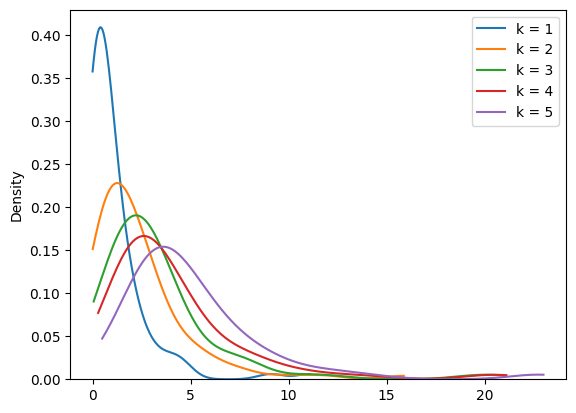

In [27]:
sns.kdeplot(x = chi_square1, clip=(chi_square1.min(), chi_square1.max()), label = 'k = 1')
sns.kdeplot(x = chi_square2, clip=(chi_square2.min(), chi_square2.max()), label = 'k = 2')
sns.kdeplot(x = chi_square3, clip=(chi_square3.min(), chi_square3.max()), label = 'k = 3')
sns.kdeplot(x = chi_square4, clip=(chi_square4.min(), chi_square4.max()), label = 'k = 4')
sns.kdeplot(x = chi_square5, clip=(chi_square5.min(), chi_square5.max()), label = 'k = 5')


plt.legend()
plt.show()

### how we calculate the p_value using the test_statistic and degree of freedom. 

In [10]:

from scipy import stats

# it will be calculated using the formula --- > test_statistic = summisation of ((observed - expected)^2 / expected)
test_statistic = 4.28 

# it is calculated by formula ----> df = k - 1 where k is not of category in that column. 
degree_of_freedom = 5

p_value = stats.chi2.sf(test_statistic, degree_of_freedom)
print('P-Value is : ', p_value)


P-Value is :  0.5098464622614263


### Python case Study (Goodness-of-fit test).

In [12]:
import pandas as pd 
import numpy as np   
from scipy.stats import chisquare

In [13]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
observed = titanic_df['Pclass'].value_counts().sort_index()
observed

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [27]:
# Null Hypothesis : Follow the Uniform Distribution.  
# Alternate Hypothesis : Not follow the uniform distribution. 

In [41]:
# Calculate the expected counts assuming a uniform distribution. 
total_count = len(titanic_df)
expected_count = total_count / 3

expected = [expected_count] * 3

print("Expected Passenger Counts (Assuming uniform distribution) : ", expected)

Expected Passenger Counts (Assuming uniform distribution) :  [297.0, 297.0, 297.0]


In [49]:
# Perform the Chi-Square Goodness of Fit test. 
test_statistic, p_value = chisquare(observed, expected)

print("Chi-Square test statistic : {:.2f}".format(test_statistic))
print("P-value : {:.4f}".format(p_value))

Chi-Square test statistic : 191.80
P-value : 0.0000


In [52]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("We fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")

We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


### Chi-Square test for independence.

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
import pandas as pd 
import numpy as np    

from scipy.stats import chi2_contingency

In [60]:
contigency_table = pd.crosstab(titanic_df['Survived'], titanic_df['Pclass'])
contigency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [71]:
# Perform the Chi-Square test. 
chi2, p_value, dof, expected_frequency = chi2_contingency(contigency_table)


# print. 
print('Chi-Square Statistic : {:.2f}'.format(chi2))
print('P-Value : {:.2f}'.format(p_value))
print('Degree of freedom (dof) : {}'.format(dof))
print('Expected Frequencies : \n {}'.format(expected_frequency))

Chi-Square Statistic : 102.89
P-Value : 0.00
Degree of freedom (dof) : 2
Expected Frequencies : 
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [73]:
# check for hypothesis. 

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis, their is an association between the Survived column and Pclass column.")
else:
    print("We fail to reject the null hypothesis, because their is no assciation between these two columns.")

We reject the null hypothesis, their is an association between the Survived column and Pclass column.
